In [1]:
import mne
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift

In [2]:
fs = 1200

### FFRs for a single sub

In [3]:
files = glob.glob('../data/bids/derivatives/preprocess_ffr/sub-*/*fif.gz')
for file in files:
    epochs = mne.read_epochs(file)
    break

Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-7/sub-7_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
4129 matching events found
No baseline correction applied
0 projection items activated


In [4]:
# # Compute grand average
# conditions = list(epochs.event_id.keys())
# evokeds = {c:epochs[c].average() for c in conditions}

# # Plot
# evokeds['50'].plot(titles = '50 Hz')
# evokeds['100'].plot(titles = '100 Hz')
# evokeds['150'].plot(titles = '150 Hz')
# evokeds['200'].plot(titles = '200 Hz')
# evokeds['250'].plot(titles = '250 Hz')
# print('')

### FFRs averaged over all subs

In [5]:
files = glob.glob('../data/bids/derivatives/preprocess_ffr/sub-*/*fif.gz')
for file in files:
    sub_epochs = mne.read_epochs(file)
    epochs = mne.concatenate_epochs([epochs, sub_epochs])

Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-7/sub-7_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
4129 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
8258 matching events found
Applying baseline correction (mode: mean)
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-23/sub-23_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
4781 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
13039 matching events found
Applying baseline correction (mode: mean)
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preproce

Not setting metadata
71003 matching events found
Applying baseline correction (mode: mean)
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-43/sub-43_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
4764 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
75767 matching events found
Applying baseline correction (mode: mean)
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-36/sub-36_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
4781 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
80548 matching events found
Applying baseline correctio

Not setting metadata
165 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
132583 matching events found
Applying baseline correction (mode: mean)
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-6/sub-6_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
4561 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
137144 matching events found
Applying baseline correction (mode: mean)
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-18/sub-18_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
4531 matching events found
No baseline correction applie

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Need more than one channel to make topography for eeg. Disabling interactivity.


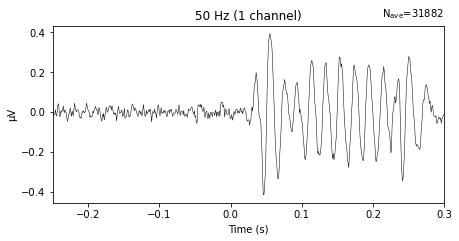

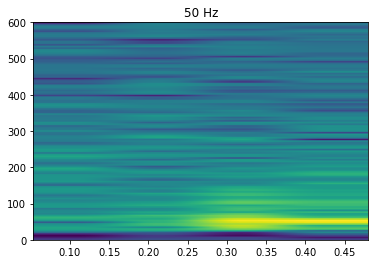

Need more than one channel to make topography for eeg. Disabling interactivity.


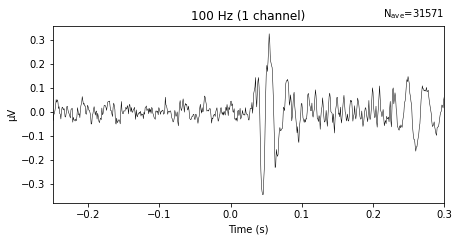

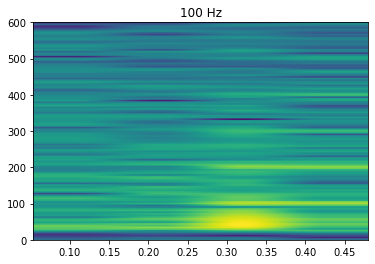

Need more than one channel to make topography for eeg. Disabling interactivity.


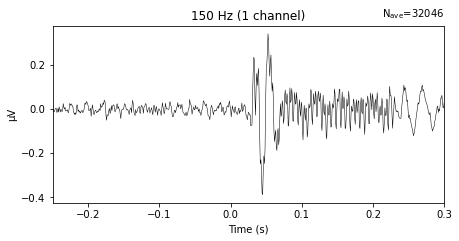

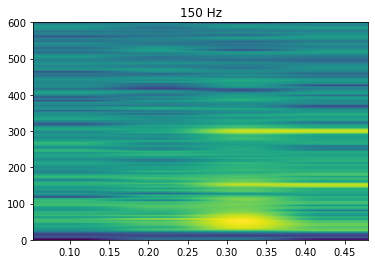

Need more than one channel to make topography for eeg. Disabling interactivity.


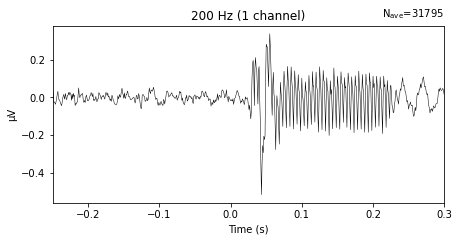

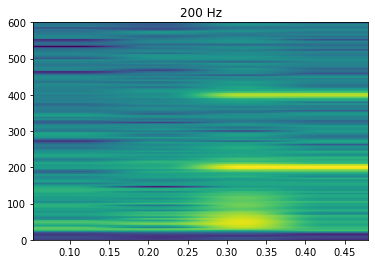

Need more than one channel to make topography for eeg. Disabling interactivity.


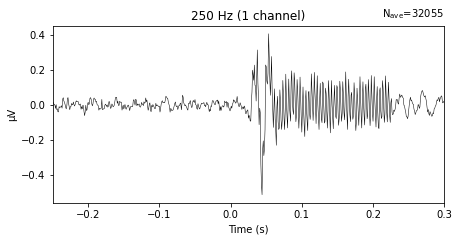

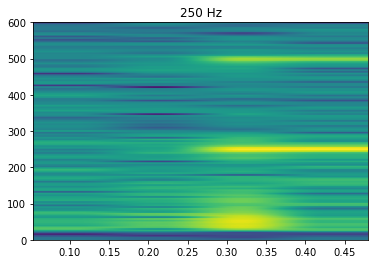

In [6]:
# Compute grand average 
conditions = list(epochs.event_id.keys())
evokeds = {c:epochs[c].average() for c in conditions}

def spectrogram(x, fs, title):
    x = x.flatten()
    powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(x, Fs= fs)
    plt.title(title)
    plt.show()

# Plot
evokeds['50'].plot(titles = '50 Hz')
spectrogram(evokeds['50'].get_data(), fs, title = '50 Hz')
evokeds['100'].plot(titles = '100 Hz')
spectrogram(evokeds['100'].get_data(), fs, title = '100 Hz')
evokeds['150'].plot(titles = '150 Hz')
spectrogram(evokeds['150'].get_data(), fs, title = '150 Hz')
evokeds['200'].plot(titles = '200 Hz')
spectrogram(evokeds['200'].get_data(), fs, title = '200 Hz')
evokeds['250'].plot(titles = '250 Hz')
spectrogram(evokeds['250'].get_data(), fs, title = '250 Hz')
print('')

### FFT

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


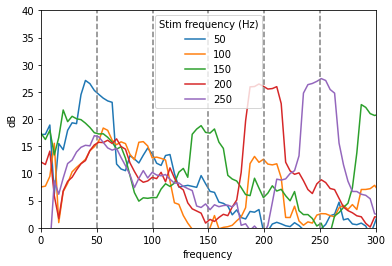

In [9]:
def plot_power_spectrum(evokeds, stim_freq):
    poststim = evokeds.compute_psd(tmin = 0., tmax = 0.25)
    baseline = evokeds.compute_psd(tmin = -0.25, tmax = 0.)
    power = 10 * np.log10(poststim.get_data() / baseline.get_data())
    power = np.squeeze(power)
    freqs = poststim.freqs

    plt.plot(freqs, power, label = str(stim_freq))
    plt.xlabel('frequency')
    plt.ylabel('dB')
    plt.xlim(0, 300)
    plt.ylim(0, 40)
    plt.axvline(stim_freq, linestyle = '--', color = 'grey')
#     plt.show()
    
plot_power_spectrum(evokeds['50'], 50)
plot_power_spectrum(evokeds['100'], 100)
plot_power_spectrum(evokeds['150'], 150)
plot_power_spectrum(evokeds['200'], 200)
plot_power_spectrum(evokeds['250'], 250)
plt.legend(title = 'Stim frequency (Hz)')

(0.0, 280.0)

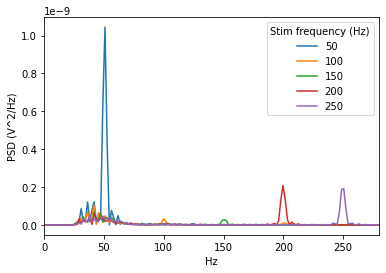

In [10]:
x = evokeds['50'].get_data()
time_step = 1 / fs
freqs = np.fft.fftfreq(x.size, time_step)
idx = np.argsort(freqs)

x = x.flatten()
ps = np.abs(np.fft.fft(x))**2
plt.plot(freqs[idx], ps[idx], label = "50")

x = evokeds['100'].get_data()
x = x.flatten()
ps = np.abs(np.fft.fft(x))**2
plt.plot(freqs[idx], ps[idx], label = "100")

x = evokeds['150'].get_data()
x = x.flatten()
ps = np.abs(np.fft.fft(x))**2
plt.plot(freqs[idx], ps[idx], label = "150")

x = evokeds['200'].get_data()
x = x.flatten()
ps = np.abs(np.fft.fft(x))**2
plt.plot(freqs[idx], ps[idx], label = "200")

x = evokeds['250'].get_data()
x = x.flatten()
ps = np.abs(np.fft.fft(x))**2
plt.plot(freqs[idx], ps[idx], label = "250")

plt.legend(title = 'Stim frequency (Hz)')
plt.xlabel("Hz")
plt.ylabel("PSD (V^2/Hz)")
plt.xlim(0, 280)

### Get trial counts

In [11]:
from bids import BIDSLayout
from util.io.iter_BIDSPaths import *
import pandas as pd

In [12]:
BIDS_ROOT = '../data/bids'
layout = BIDSLayout(BIDS_ROOT, derivatives = True)
fpaths = layout.get(scope = 'preprocess_ffr',
                suffix='epo',
                extension = 'fif.gz',
                return_type = 'filename')

trials_50 = []
trials_100 = []
trials_150 = []
trials_200 = []
trials_250 = []
subs = []
    
for (fpath, sub, task, run) in iter_BIDSPaths(fpaths):
    subs.append(sub)
    sub_epochs = mne.read_epochs(fpath)
    trials_50.append(len(sub_epochs['50']))
    trials_100.append(len(sub_epochs['100']))
    trials_150.append(len(sub_epochs['150']))
    trials_200.append(len(sub_epochs['200']))
    trials_250.append(len(sub_epochs['250']))

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


('/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-3/sub-3_task-pitch_run-1_desc-forFFR_epo.fif.gz', '3', 'pitch', '1')
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-3/sub-3_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
2352 matching events found
No baseline correction applied
0 projection items activated
('/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-3/sub-3_task-pitch_run-2_desc-forFFR_epo.fif.gz', '3', 'pitch', '2')
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-3/sub-3_task-pitch_run-2_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
2279 matching events found
No baseline corr

        t =    -250.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
4531 matching events found
No baseline correction applied
0 projection items activated
('/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-19/sub-19_task-pitch_run-1_desc-forFFR_epo.fif.gz', '19', 'pitch', '1')
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-19/sub-19_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
4257 matching events found
No baseline correction applied
0 projection items activated
('/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-20/sub-20_task-pitch_run-1_desc-forFFR_epo.fif.gz', '20', 'pitch', '1')
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-20/sub-20_task-pitch_run-1_desc-

    Found the data of interest:
        t =    -250.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
4613 matching events found
No baseline correction applied
0 projection items activated
('/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-34/sub-34_task-pitch_run-1_desc-forFFR_epo.fif.gz', '34', 'pitch', '1')
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-34/sub-34_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
501 matching events found
No baseline correction applied
0 projection items activated
('/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-35/sub-35_task-pitch_run-1_desc-forFFR_epo.fif.gz', '35', 'pitch', '1')
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-3

In [13]:
# Construct data frame
d = {'sub': subs, 
     '50': trials_50, 
     '100': trials_100, 
     '150': trials_150, 
     '200': trials_200, 
     '250': trials_250}
df = pd.DataFrame(data = d)
df

,sub,50,100,150,200,250
0,3,467,443,492,469,481
1,3,473,457,487,419,443
2,5,702,654,718,714,650
3,6,924,855,919,904,959
4,7,840,819,854,826,790
5,8,787,826,825,794,871
6,9,228,244,239,224,222
7,10,893,906,920,914,915
8,11,923,896,931,955,941
9,12,911,920,930,861,909
